In [1]:
import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt

/tmp/ipykernel_2169/3943573361.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data=pd.read_csv('Creditcard_data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(772, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

Class
0    763
1      9
Name: count, dtype: int64

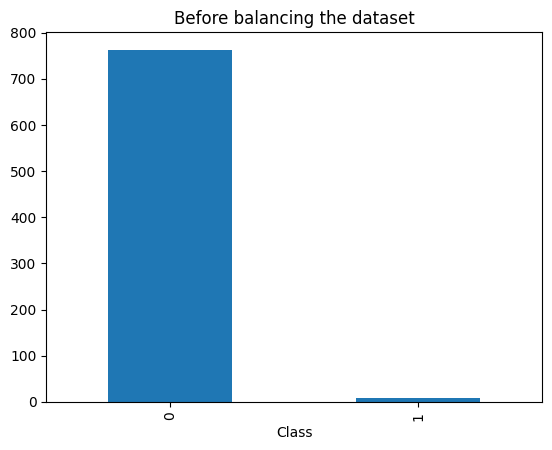

In [7]:
data['Class'].value_counts().plot(kind='bar',title='Before balancing the dataset')
plt.show()

In [8]:
X = data.drop('Class', axis = 1)
y = data['Class']

**OVERSAMPLING TECHNIQUE TO BALANCE THE DATASET**

SMOTE used

In [9]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_newsample,y_newsample=smote.fit_resample(X, y)
data_new=X_newsample.join(y_newsample)

In [10]:
data_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,147,0.499019,0.478728,0.398079,0.323202,0.392742,-0.224583,0.220847,0.016196,-0.066068,...,-0.185967,-0.544283,0.142753,-0.750439,-0.810982,0.082361,0.139866,0.158395,1.602306,1
1522,234,0.332718,-0.455848,0.915682,0.819721,0.431184,-0.598740,-0.535563,0.077942,0.296802,...,-0.086455,-0.258179,0.176170,0.000480,0.092644,0.311781,-0.052041,-0.026316,2.352903,1
1523,133,0.858362,0.417669,0.352636,0.499054,0.029445,-0.626605,0.157114,-0.087929,-0.017948,...,-0.234278,-0.681384,0.135779,-0.232330,-0.322794,0.088228,0.062273,0.097781,2.119382,1
1524,150,0.428876,0.490647,0.406949,0.288876,0.463657,-0.146108,0.233288,0.036521,-0.075461,...,-0.176537,-0.517521,0.144115,-0.851573,-0.906276,0.081215,0.155012,0.170226,1.501373,1


In [11]:
data_new['Class'].value_counts()

Class
0    763
1    763
Name: count, dtype: int64

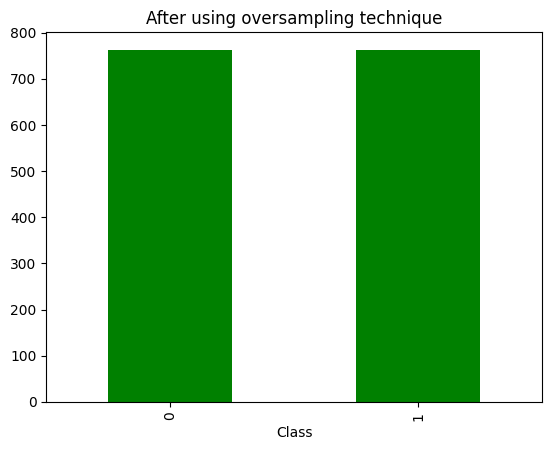

In [12]:
data_new['Class'].value_counts().plot(kind='bar',color='green',title='After using oversampling technique')
plt.show()

**SAMPLE** **SIZE**

In [13]:
import math
population_size = X_newsample.shape[0]
n = 1.96**2*0.5*0.5/0.05**2
n

384.1599999999999

**CREATING SAMPLES**

1.  SIMPLE RANDOM SAMPLING




In [14]:
data_random_sample = data_new.sample(n=math.ceil(n), random_state=42 , replace=False)
data_random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1439,461,-1.365895,0.155223,1.035856,-0.497955,0.900534,-0.180055,0.274685,0.140398,-0.006669,...,-0.169100,-0.231092,-0.176961,-0.469160,-0.551823,0.206406,-0.226484,-0.257337,0.997943,1
76,49,-0.549626,0.418949,1.729833,0.203065,-0.187012,0.253878,0.500894,0.251256,-0.227985,...,0.115062,0.418529,-0.065133,0.264981,0.003958,0.395969,0.027182,0.043506,59.990000,0
1010,58,1.223316,0.308126,0.234334,0.570365,-0.155251,-0.575220,0.003807,-0.058550,-0.110456,...,-0.256616,-0.735463,0.114656,-0.000958,0.191503,0.110333,-0.016153,0.022790,2.690000,1
660,499,1.255439,0.307729,0.292700,0.699873,-0.428876,-1.088456,0.043840,-0.167739,0.128854,...,-0.294795,-0.882126,0.136846,0.327949,0.194459,0.096516,-0.027271,0.029491,1.980000,0
1132,490,-2.698692,-2.938482,1.544312,1.908873,1.724239,-0.516262,-0.479785,0.215281,0.135656,...,0.582592,0.686736,1.019493,-0.480053,0.114769,0.187388,-0.210401,-0.032620,354.587231,1


2. SYSTEMATIC RANDOM SAMPLING



In [15]:
k = int((population_size)/math.ceil(n))
start = np.random.randint(0, k)
systematic_sample = data_new.iloc[start::k]
systematic_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
10,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
13,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0


3. CLUSTER SAMPLING

In [16]:
def get_clustered_Sample(data, n_per_cluster, num_select_clusters):
    N = len(data)
    K = int(N/n_per_cluster)
    df = None
    for k in range(K):
        sample_k = data.sample(n_per_cluster)
        sample_k["cluster"] = np.repeat(k,len(sample_k))
        data = data.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)

    random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
    samples = data[data.cluster.isin(random_chosen_clusters)]
    return(samples)

data_cluster_sample = get_clustered_Sample(data = data_new, n_per_cluster = int(n), num_select_clusters = 1)
data_cluster_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,cluster
925,177,0.902051,0.358031,0.535032,0.610606,-0.155217,-1.042898,0.214839,-0.195360,0.006500,...,-0.652604,0.065682,0.346855,0.244259,0.006034,-0.036462,0.005570,2.416827,1,1.0
235,156,-3.494861,-2.894450,1.637989,-0.274976,-0.389203,-0.703275,0.444194,0.154266,0.695818,...,-0.063521,0.676254,0.596377,0.114229,0.834915,0.309675,0.632261,500.000000,0,1.0
1185,246,-0.739955,1.028713,-0.251094,1.438917,0.364301,-0.320670,-0.669880,0.566442,-1.025602,...,-0.263657,-0.059100,-0.789723,-0.900270,0.110337,0.241772,0.102838,0.652443,1,1.0
559,417,-2.680348,1.872052,1.144712,-0.693664,0.155172,0.601325,0.904201,-0.520079,3.013065,...,0.485421,-0.365437,-0.744118,0.328655,0.457695,0.566152,0.168241,29.990000,0,1.0
382,280,0.878794,-0.266909,0.409706,1.509808,-0.487798,0.376829,-0.389288,0.331361,0.702728,...,0.110527,-0.191237,-0.059199,0.504350,-0.271526,0.059100,0.053501,109.150000,0,1.0


4. BOOTSTRAP SAMPLING

In [17]:
data_bootstrap_sample = data_new.sample(n = math.ceil(n), replace = True, random_state = 42)
data_bootstrap_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1126,561,0.330876,-0.448872,0.921415,0.818478,0.444322,-0.594786,-0.532801,0.073772,0.283084,...,-0.085088,-0.247177,0.176070,0.001713,0.095833,0.312464,-0.051327,-0.026518,1.349736,1
1459,417,-2.077274,1.847528,-1.483700,3.780241,-0.511368,-1.402914,-2.364187,1.286226,-2.586827,...,0.464312,-0.086753,-0.426192,0.321707,0.056142,0.172348,0.242498,-0.131810,0.084900,1
860,143,0.607487,0.460298,0.384362,0.376283,0.283081,-0.345933,0.201609,-0.015234,-0.051543,...,-0.200550,-0.585667,0.140648,-0.594048,-0.663623,0.084132,0.116445,0.140099,1.758385,1
1294,46,0.912225,0.024252,0.368002,0.508759,0.270414,-0.023094,-0.256737,0.146701,-0.149067,...,-0.168995,-0.478021,0.118504,-0.385154,0.133317,0.190286,-0.019112,-0.001549,2.585765,1
1130,450,-2.804648,-1.488293,0.207026,2.846995,0.745029,-1.182984,-0.609647,0.408954,-1.087326,...,0.614505,0.281774,0.774523,-0.093232,0.202941,-0.039784,-0.084896,-0.022721,356.195761,1


**MODEL EVALUATION**

**1. LOGISTIC REGRESSION**

1. Simple Random Sampling

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
scaler=StandardScaler()
X_random_sample = data_random_sample.drop('Class', axis = 1)
y_random_sample = data_random_sample['Class']
X_random_scaled = scaler.fit_transform(X_random_sample)
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_random_scaled, y_random_sample, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy for simple random sampling using LR:", accuracy)

Accuracy for simple random sampling using LR: 0.8793103448275862


2. Systematic Random Sampling

In [19]:
X_systematic_sample = systematic_sample.drop('Class', axis = 1)
y_systematic_sample = systematic_sample['Class']
X_systematic_scaled = scaler.fit_transform(X_systematic_sample)
X_train_systematic, X_test_systematic, y_train_systematic, y_test_systematic = train_test_split(X_systematic_scaled, y_systematic_sample, test_size=0.3, random_state=42)

model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy for simplifed random sampling using LR:", accuracy)

Accuracy for simplifed random sampling using LR: 0.9215686274509803


3. Cluster Sampling

In [20]:
X_cluster_sample = data_cluster_sample.drop('Class', axis = 1)
y_cluster_sample = data_cluster_sample['Class']
X_cluster_scaled = scaler.fit_transform(X_cluster_sample)
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster_scaled, y_cluster_sample, test_size=0.3, random_state=42)

model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)

accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy for cluster sampling using LR :", accuracy)

Accuracy for cluster sampling using LR : 0.8977272727272727


4. Bootstrap Sampling

In [21]:
X_bootstrap_sample = data_bootstrap_sample.drop('Class', axis = 1)
y_bootstrap_sample = data_bootstrap_sample['Class']
X_bootstrap_scaled = scaler.fit_transform(X_bootstrap_sample)
X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(X_bootstrap_scaled, y_bootstrap_sample, test_size=0.3, random_state=42)

model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)

accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy for bootstrap sampling using LR :", accuracy)

Accuracy for bootstrap sampling using LR : 0.9568965517241379


**2. SVC SUPPORT VECTOR CLASSIFIER**

1. Simple Random Sampling

In [22]:
from sklearn import svm
model= svm.SVC()
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy of Simple Random Sampling using SVC:", accuracy)

Accuracy of Simple Random Sampling using SVC: 0.9224137931034483


2. Systematic Random Sampling

In [23]:
model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy of Systematic Random Sampling using SVC:", accuracy)

Accuracy of Systematic Random Sampling using SVC: 0.9803921568627451


3. Cluster Sampling

In [24]:
model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)
accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy of Cluster Sampling using SVC:", accuracy)

Accuracy of Cluster Sampling using SVC: 0.9318181818181818


4. Bootstrap Sampling

In [25]:
model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy of Bootstrap Sampling using SVC:", accuracy)

Accuracy of Bootstrap Sampling using SVC: 0.9568965517241379


**3. XGBOOST CLASSIFIER**

1. Simple Random Sampling

In [26]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy of Simple Random Sampling using xgb:", accuracy)

Accuracy of Simple Random Sampling using xgb: 0.9482758620689655


2. Systematic Random Sampling

In [27]:
model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy of Systematic Random Sampling using xgb:", accuracy)

Accuracy of Systematic Random Sampling using xgb: 0.9411764705882353


3. Cluster Sampling

In [28]:
model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)
accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy of Cluster Sampling using xgb:", accuracy)

Accuracy of Cluster Sampling using xgb: 0.9318181818181818


4. Bootstrap Sampling

In [29]:
model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy of Bootstrap Sampling using xgb:", accuracy)

Accuracy of Bootstrap Sampling using xgb: 0.9741379310344828


**4. RANDOM FOREST**

1. Simple Random Sampling

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy of Simple Random Sampling using RF:", accuracy)

Accuracy of Simple Random Sampling using RF: 0.9827586206896551


2. Sytematic Random Sampling

In [31]:
model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy of Systematic Random Sampling using RF:", accuracy)

Accuracy of Systematic Random Sampling using RF: 0.9803921568627451


3. Cluster Sampling

In [32]:
model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)
accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy of Cluster Sampling using RF:", accuracy)

Accuracy of Cluster Sampling using RF: 0.9886363636363636


4. Bootstrap Sampling

In [33]:
model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy of Bootstrap Sampling using RF:", accuracy)

Accuracy of Bootstrap Sampling using RF: 1.0




**5. GAUSSIAN NAIVE BAYES**

1. Simple Random Sampling

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_random, y_train_random)
y_pred = model.predict(X_test_random)
accuracy = accuracy_score(y_test_random, y_pred)
print("Accuracy of Simple Random Sampling using NB:", accuracy)

Accuracy of Simple Random Sampling using NB: 0.8879310344827587


2. Systematic Random Sampling

In [35]:
model.fit(X_train_systematic, y_train_systematic)
y_pred = model.predict(X_test_systematic)
accuracy = accuracy_score(y_test_systematic, y_pred)
print("Accuracy of Systematic Random Sampling using NB:", accuracy)

Accuracy of Systematic Random Sampling using NB: 0.8888888888888888


3. Cluster Sampling

In [36]:
model.fit(X_train_cluster, y_train_cluster)
y_pred = model.predict(X_test_cluster)
accuracy = accuracy_score(y_test_cluster, y_pred)
print("Accuracy of Cluster Sampling using NB:", accuracy)

Accuracy of Cluster Sampling using NB: 0.8522727272727273


4. Bootstrap Sampling

In [37]:
model.fit(X_train_bootstrap, y_train_bootstrap)
y_pred = model.predict(X_test_bootstrap)
accuracy = accuracy_score(y_test_bootstrap, y_pred)
print("Accuracy of Bootstrap Sampling using NB:", accuracy)

Accuracy of Bootstrap Sampling using NB: 0.853448275862069
